## Importing Files

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import os

In [ ]:
df = []

os.chdir('../..')
os.chdir('debugprov-experimentdata')
os.chdir('excel_processing')
os.chdir('excel_files')

for excel_file in os.listdir():
    data = pd.read_excel(excel_file)
    df.append(data)

os.chdir('..')

os.mkdir('analysis')
os.mkdir('analysis/by_navigation_strategy')

df = pd.concat(df)
#print(df['Subject'])

In [ ]:
single_stepping = "Single Stepping"
top_down = "Top Down"
heaviest_first = "Heaviest First"
divide_and_query = "Divide and Query"

single_stepping_prov = "Single Stepping PROV"
top_down_prov = "Top Down PROV"
heaviest_first_prov = "Heaviest First PROV"
divide_and_query_prov = "Divide and Query PROV"

NavigationStrategies = [single_stepping,top_down,heaviest_first,divide_and_query,
                        single_stepping_prov,top_down_prov,heaviest_first_prov,divide_and_query_prov]

## Searching for executions that the buggy node was not correct 

In [ ]:
# Strategy 1 : Include all executions to analysis even when the found buggy node was not the expected buggy node
# Strategy 2 : Exclude the entire subject when in a single execution the found buggy node was not the expected buggy node 
#              (Strategy 2 allows paired analysis)
# Strategy 3: Exclude a single execution when the found buggy node was not the expected buggy node 
#             (Strategy 3 DOES NOT allows paired analysis)

strategy = 1

In [ ]:
stored = 0
discarted = 0
if strategy == 1:
    pass
elif strategy == 2:
    selecteds = []
    for index, row in df.iterrows():
        expected_buggy_node = row['Expected Buggy Node'] 
        discart = False
        for nav in NavigationStrategies:
            #print(row['Subject'],expected_buggy_node,row[nav + ' Buggy Node Found'])
            #print(int(expected_buggy_node),int(row[nav + ' Buggy Node Found']))
            if int(expected_buggy_node) != int(row[nav + ' Buggy Node Found']):
                discart = True
        if not discart:
            stored += 1
            selecteds.append(row)
        else:
            print(row)
            discarted += 1
    df = pd.DataFrame(selecteds)
elif strategy == 3:
    pass

print(stored,discarted)

In [ ]:
len(df)

## Generalized Analysis

In [7]:
without_prov = []
with_prov = []

In [8]:
for t in df[single_stepping]:
    without_prov.append(t)
for t in df[top_down]:
    without_prov.append(t)
for t in df[heaviest_first]:
    without_prov.append(t)
for t in df[divide_and_query]:
    without_prov.append(t)

for t in df[single_stepping_prov]:
    with_prov.append(t)
for t in df[top_down_prov]:
    with_prov.append(t)
for t in df[heaviest_first_prov]:
    with_prov.append(t)
for t in df[divide_and_query_prov]:
    with_prov.append(t)
    

In [9]:
len(without_prov)

In [10]:
len(with_prov)

In [11]:
data_frame = pd.DataFrame({
            'without_prov': without_prov,
            'with_prov': with_prov,
})
data_frame.to_excel('analysis/generalized_analysis.xlsx') 

In [12]:
data_frame.boxplot()

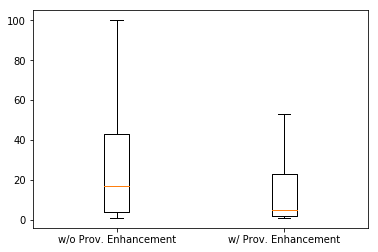

In [50]:
plt.boxplot([without_prov,with_prov],showfliers=False,labels=['w/o Prov. Enhancement','w/ Prov. Enhancement'])
plt.savefig('analysis/generalized_analysis.pdf')

In [28]:
print("Improvement: {}".format((sum(without_prov) - sum(with_prov)) / sum(without_prov)))

Improvement: 0.39942857912966134


## Analysis by navigation strategy

In [29]:
r_single_stepping = []
r_single_stepping_prov = []

r_top_down = []
r_top_down_prov = []

r_heaviest_first = []
r_heaviest_first_prov = []

r_divide_and_query = []
r_divide_and_query_prov = []

In [30]:
for t in df[single_stepping]:
    r_single_stepping.append(t)
    
for t in df[single_stepping_prov]:
    r_single_stepping_prov.append(t)

for t in df[top_down]:
    r_top_down.append(t)
    
for t in df[top_down_prov]:
    r_top_down_prov.append(t)

for t in df[heaviest_first]:
    r_heaviest_first.append(t)
    
for t in df[heaviest_first_prov]:
    r_heaviest_first_prov.append(t)
    
for t in df[divide_and_query]:
    r_divide_and_query.append(t)
    
for t in df[divide_and_query_prov]:
    r_divide_and_query_prov.append(t)

### Single Stepping

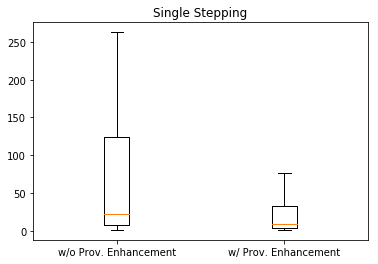

In [46]:
plt.boxplot([r_single_stepping,r_single_stepping_prov],showfliers=False,labels=['w/o Prov. Enhancement','w/ Prov. Enhancement'])
plt.title(single_stepping)
plt.savefig('analysis/by_navigation_strategy/single_stepping.pdf')

In [32]:
single_stepping_data_frame = pd.DataFrame({
            'without_prov': r_single_stepping,
            'with_prov': r_single_stepping_prov,
})
single_stepping_data_frame.to_excel('analysis/by_navigation_strategy/single_stepping.xlsx') 

In [40]:
print("Single Stepping Improvement: {}".format((sum(r_single_stepping) - sum(r_single_stepping_prov)) / sum(r_single_stepping)))

Single Stepping Improvement: 0.5080278371417611


### Top Down

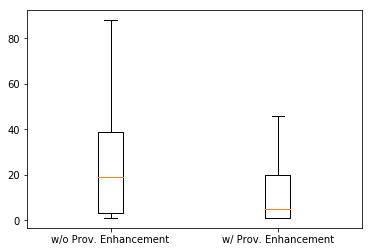

In [45]:
plt.boxplot([r_top_down,r_top_down_prov],showfliers=False,labels=['w/o Prov. Enhancement','w/ Prov. Enhancement'])
plt.title(top_down)
plt.savefig('analysis/by_navigation_strategy/top_down.pdf')

In [38]:
top_down_data_frame = pd.DataFrame({
            'without_prov': r_top_down,
            'with_prov': r_top_down_prov,
})
top_down_data_frame.to_excel('analysis/by_navigation_strategy/top_down.xlsx') 

In [39]:
print("Top Down Improvement: {}".format((sum(r_top_down) - sum(r_top_down_prov)) / sum(r_top_down)))

Top Down Improvement: 0.3756470853027234


### Heaviest First

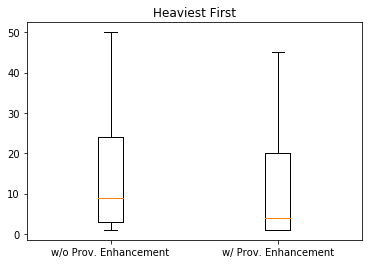

In [48]:
plt.boxplot([r_heaviest_first,r_heaviest_first_prov],showfliers=False,labels=['w/o Prov. Enhancement','w/ Prov. Enhancement'])
plt.title(heaviest_first)
plt.savefig('analysis/by_navigation_strategy/heaviest_first.pdf')

In [21]:
heaviest_first_data_frame = pd.DataFrame({
            'without_prov': r_heaviest_first,
            'with_prov': r_heaviest_first_prov,
})
heaviest_first_data_frame.to_excel('analysis/by_navigation_strategy/heaviest_first.xlsx') 

In [41]:
print("Heaviest First Improvement: {}".format((sum(r_heaviest_first) - sum(r_heaviest_first_prov)) / sum(r_heaviest_first)))

Heaviest First Improvement: 0.2706458797327394


### Divide and Query

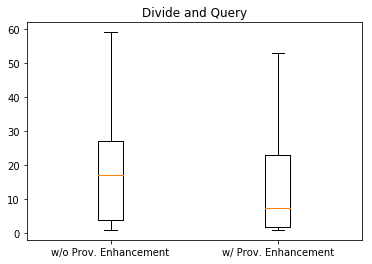

In [49]:
plt.boxplot([r_divide_and_query,r_divide_and_query_prov],showfliers=False,labels=['w/o Prov. Enhancement','w/ Prov. Enhancement'])
plt.title(divide_and_query)
plt.savefig('analysis/by_navigation_strategy/divide_and_query.pdf')

In [23]:
divide_and_query_data_frame = pd.DataFrame({
            'without_prov': r_divide_and_query,
            'with_prov': r_divide_and_query_prov,
})
divide_and_query_data_frame.to_excel('analysis/by_navigation_strategy/divide_and_query.xlsx') 

In [42]:
print("Divide and Query Improvement: {}".format((sum(r_divide_and_query) - sum(r_divide_and_query_prov)) / sum(r_divide_and_query)))

Divide and Query Improvement: 0.23203285420944558
